## Task 1

In [1]:
from collections import defaultdict, deque
ID = 'U2010050'
size = int(ID[-2:]) % 8 + 7
print("=====================")
print("My student ID is", ID)
print(f"My chessboard size is [{ID[-2:]} mod 8 + 7] => {size}x{size}", )
print("=====================")
start = input("Enter the initial position (e.g., 'a1' to 'i9'): ")
end = input("Enter the final position (e.g., 'a1' to 'i9'): ")
def isValid(pos):
    row,col = pos[-1:], pos[0]
    if not('0' <= row <= '99' and 'a' <= col <= 'n'):
        return (False,'','')
    row, col = int(row) - 1, ord(col) - ord('a')
    return (0<=row<size and 0<=col<size, row, col)
valid = False
while not valid:
    validStart, row_s, col_s = isValid(start)
    validEnd, row_e, col_e = isValid(end)
    valid = validStart and validEnd
    if valid:
        break
    print("invalid values, please try valid values again...")
    start = input("Enter the initial position (e.g., 'a1' to 'i9'): ")
    end = input("Enter the final position (e.g., 'a1' to 'i9'): ")

directions = ((-2,-1), (-2,1), (-1,-2), (-1,2), (1,-2), (1,2), (2,-1), (2,1))

def isValidPos(visited,y,x,size):
    return 0<=y<size and 0<=x<size and (y,x) not in visited

def bfs(qs, vs, parents, size, toggle):
    opp = 1^toggle
    (y,x,step,yp,xp) = qs[toggle].popleft()
    if (y,x) in vs[opp]:
        if toggle == 1:
          parents[(y,x)].append((yp,xp))
        else:
          parents[(y,x)] = [(yp,xp)] + parents[(y,x)]
        return (vs[opp][(y,x)] + step - 1, y, x, step-1)

    if (y,x) not in vs[toggle]:
        vs[toggle][(y,x)] = step
        parents[(y,x)].append((yp, xp))
        for dy,dx in directions:
            newy, newx = y+dy, x+dx
            if isValidPos(vs[toggle], newy,newx,size):
                qs[toggle].append((newy, newx, step+1, y, x))
    return -1,-1,-1,-1

def bi_directional_search(row_s,col_s,row_e,col_e, size):
    vs = [defaultdict(int), defaultdict(int)]
    parents = defaultdict(list)
    parents_f = defaultdict(list)
    toggle = 1
    ans = -1
    qs = [deque(), deque()]
    qs[0].append((row_s, col_s, 1, row_s, col_s))
    qs[1].append((row_e, col_e, 1, row_e, col_e))
    midy = midx = midstep = 0
    while qs[0] and qs[1] and ans == -1:
        ans, midy, midx, midstep = bfs(qs, vs, parents, size, toggle)
        if toggle: midstep = ans - midstep
        toggle = 1^toggle
    return ans, midy, midx, midstep, parents, vs

ans, midy, midx, midstep, parents, vs = bi_directional_search(row_s, col_s, row_e, col_e, size)
def drawPath(midy, midx, parents,size, midstep):
    p1, p2 = parents[(midy, midx)]
    matrix = [['.' for i in range(size+1)] for j in range(size+1)]
    print(midy, midx,midstep)
    for i in range(1,size+1):
        matrix[0][i] = chr(ord('a') + i - 1)
        matrix[i][0] = i
    matrix[midy+1][midx+1] = midstep
    q = deque()
    q.append((p1[0], p1[1] ,midstep-1))
    while q:
        y,x,step = q.popleft()
        if matrix[y+1][x+1] == '.':
            matrix[y+1][x+1] = step
        ny,nx = parents[(y,x)][0]
        if ny == y and nx == x: break
        q.append((ny,nx,step-1))
    q = deque()
    q.append((p2[0], p2[1] ,midstep+1))
    while q:
        y,x,step = q.popleft()
        if matrix[y+1][x+1] == '.':
            matrix[y+1][x+1] = step
        matrix[y+1][x+1] = step
        ny,nx = parents[(y,x)][0]
        if ny == y and nx == x: break
        q.append((ny,nx,step+1))
    return matrix
print(ans)
if ans == -1:
    print('there is no way knight can move to final position')
else:
    matrix = drawPath(midy, midx, parents, size, midstep)
    matrix[0][0] = ' '
    for i in range(size+1):
      print("  ".join([str(j) for j in matrix[i]]))


My student ID is U2010050
My chessboard size is [50 mod 8 + 7] => 9x9
Enter the initial position (e.g., 'a1' to 'i9'): i3
Enter the final position (e.g., 'a1' to 'i9'): g3
3
0 7 2
   a  b  c  d  e  f  g  h  i
1  .  .  .  .  .  .  .  2  .
2  .  .  .  .  .  .  .  .  .
3  .  .  .  .  .  .  3  .  1
4  .  .  .  .  .  .  .  .  .
5  .  .  .  .  .  .  .  .  .
6  .  .  .  .  .  .  .  .  .
7  .  .  .  .  .  .  .  .  .
8  .  .  .  .  .  .  .  .  .
9  .  .  .  .  .  .  .  .  .


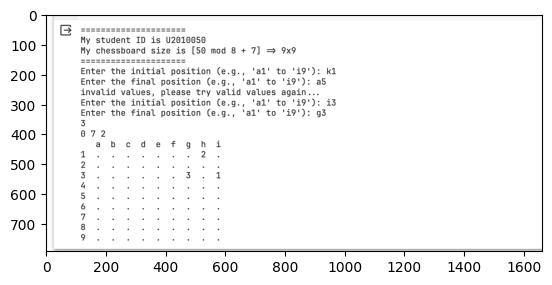

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('1.png'))

## Task 2

In [3]:
import random
ID = 'U2010050'
size = int(ID[-2:]) % 8 + 7
print("=====================")
print("My student ID is", ID)
print(f"My chessboard size is [{ID[-2:]} mod 8 + 7] => {size}x{size}", )
print("=====================")
POP_SIZE = 100
GENERATIONS = 1000

#FITNESS
def fitness(board):
    conflicts = 0
    for i in range(size):
        for j in range(i+1, size):
            if board[i] == board[j] or abs(board[i] - board[j]) == j - i:
                conflicts += 1
    return conflicts

#CROSSOVER
def crossover(parent1, parent2):
    split = random.randint(1, size-1)
    child1 = parent1[:split] + parent2[split:]
    child2 = parent2[:split] + parent1[split:]
    return child1, child2
#MUTATE
def mutate(board):
    index = random.randint(0, size-1)
    value = random.randint(0, size-1)
    board[index] = value
    return board

# INITIAL POPULATION
def initial_population(pop_size):
    population = []
    for i in range(pop_size):
        board = [random.randint(0, size-1) for j in range(size)]
        population.append(board)
    return population
#GENETIC_ALGORITHM
def genetic_algorithm(pop_size, generations):
    population = initial_population(pop_size)
    for i in range(generations):
        population = sorted(population, key=lambda x: fitness(x))
        if fitness(population[0]) == 0:
            return population[0]
        parents = population[:pop_size//2]
        offspring = []
        for j in range(pop_size//2):
            parent1 = random.choice(parents)
            parent2 = random.choice(parents)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            offspring.append(child1)
            offspring.append(child2)
        population = parents + offspring
    return None

solution = genetic_algorithm(POP_SIZE, GENERATIONS)
if solution is not None:
    matrix = [['.' for i in range(size+1)] for j in range(size+1)]
    for i in range(1,size+1):
        matrix[0][i] = chr(ord('a') + i - 1)
        matrix[i][0] = i
    for i in range(size):
      matrix[i+1][solution[i]+1] = 'Q'
    matrix[0][0] = ' '
    for i in range(size+1):
      print(" ".join([str(j) for j in matrix[i]]))
else:
    print("No solution found.")

My student ID is U2010050
My chessboard size is [50 mod 8 + 7] => 9x9
  a b c d e f g h i
1 . . . . . . . Q .
2 . . . . . Q . . .
3 . . Q . . . . . .
4 . . . . . . . . Q
5 . . . . . . Q . .
6 Q . . . . . . . .
7 . . . Q . . . . .
8 . Q . . . . . . .
9 . . . . Q . . . .


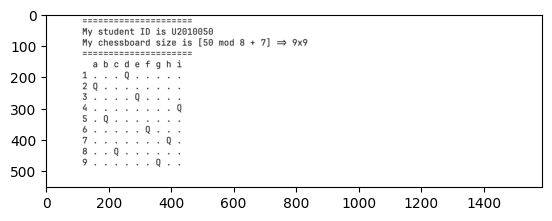

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('2.png'))